In [5]:
import pandas as pd

In [8]:
df=pd.read_excel("/Users/srisabarish/Downloads/sales_data.xlsx")

In [3]:
print(df.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


A. Mean , Mode , Median

In [4]:
print(df.mean(numeric_only=True))

Day                 15.665753
Year              2014.401739
Customer_Age        35.919212
Order_Quantity      11.901660
Unit_Cost          267.296366
Unit_Price         452.938427
Profit             285.051665
Cost               469.318695
Revenue            754.370360
dtype: float64


In [5]:
print(df.median(numeric_only=True))

Day                 16.0
Year              2014.0
Customer_Age        35.0
Order_Quantity      10.0
Unit_Cost            9.0
Unit_Price          24.0
Profit             101.0
Cost               108.0
Revenue            223.0
dtype: float64


In [6]:
print(df.mode(numeric_only=True))

    Day  Year  Customer_Age  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
0  24.0  2014          31.0             1.0        2.0         5.0     3.0   
1   NaN  2016           NaN             NaN        NaN         NaN     NaN   

     Cost  Revenue  
0  1252.0     35.0  
1     NaN      NaN  


B. Find the total number of Product_Category, Sub_Category, Product

In [12]:
products_category=df['Product_Category'].nunique()
print(f"Total Product Categories: {products_category}")

Total Product Categories: 3


In [9]:
products_sub_category=df['Sub_Category'].nunique()
print(f"Total Product sub Categories: {products_sub_category}")

Total Product sub Categories: 17


In [10]:
product_categories=df['Product'].nunique()
print(f" Total product categories: {products_category}")

 Total product categories: 3


C. Histogram for Customer Age

In [14]:
import matplotlib.pyplot as plt

In [14]:
df['Customer_Age']=pd.to_numeric(df['Customer_Age'], errors='coerce')

In [15]:
df=df.dropna(subset=['Customer_Age'])

<function matplotlib.pyplot.show(close=None, block=None)>

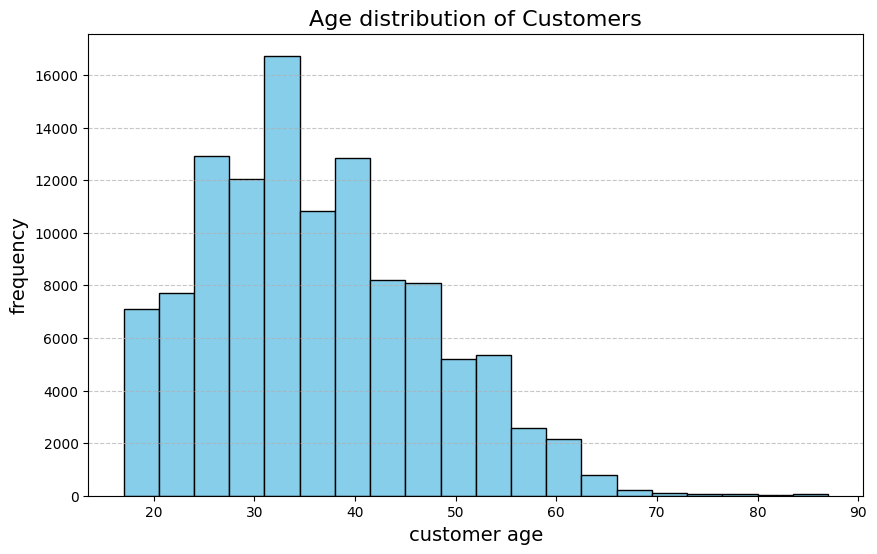

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df['Customer_Age'],bins=20,color='skyblue',edgecolor='black')
plt.title('Age distribution of Customers',fontsize=16)
plt.xlabel('customer age', fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show

E.  Pie chart to visualise gender distribution

In [18]:
gender_counts=df['Customer_Gender'].value_counts()

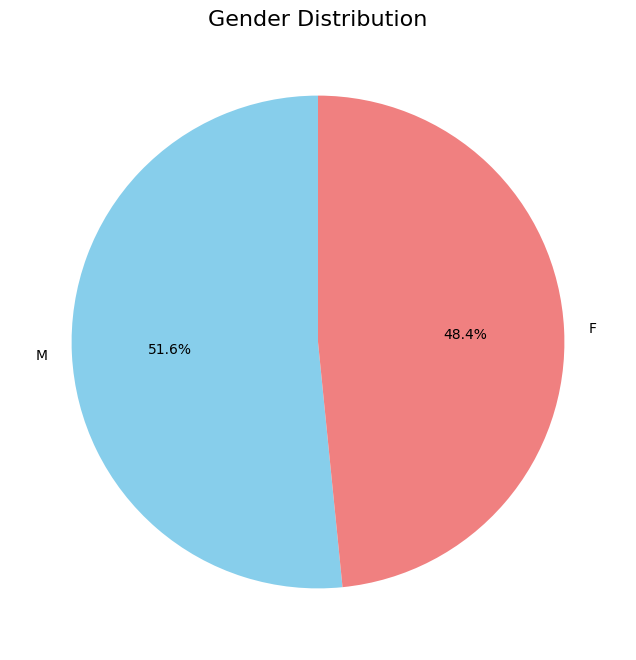

In [19]:
plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution', fontsize=16)
plt.show()

F. Bar chart to show the relationship between Age_Group and Revenue. 

In [26]:
bins = [0,25, 34, 64, 100] 
labels = ['Youth (<25)', 'Young Adults (25-34)', 'Adults (35-64)', 'Seniors (64+)']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False, include_lowest=True)

In [23]:
age_group_revenue = df.groupby('Age_Group', observed=False)['Revenue'].sum()

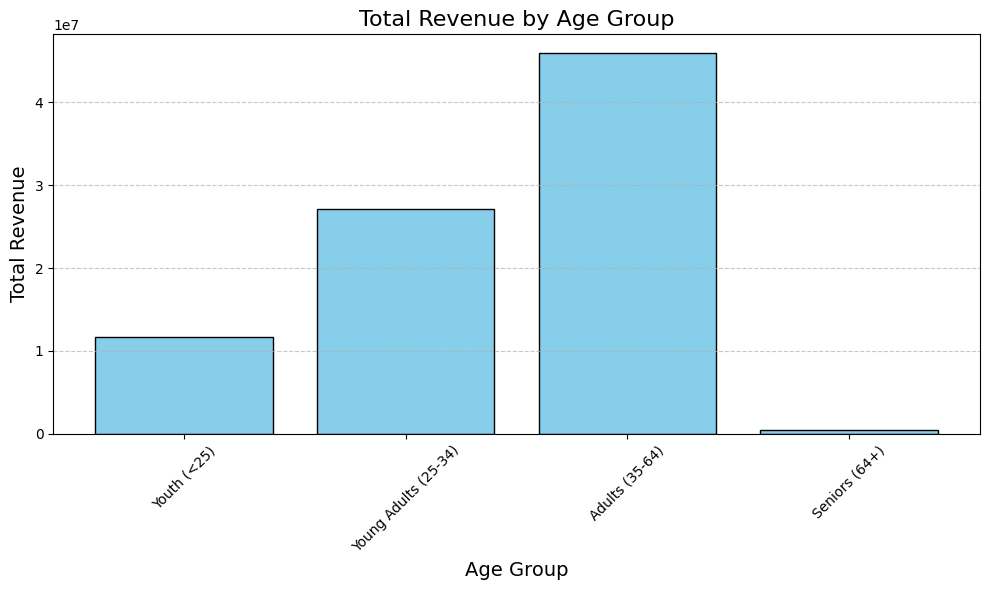

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(age_group_revenue.index.astype(str), age_group_revenue.values, color='skyblue', edgecolor='black')
plt.title('Total Revenue by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
max_revenue_group = age_group_revenue.idxmax()
max_revenue_value = age_group_revenue.max() 
print(f"The age group that generates the most revenue is '{max_revenue_group}' with a total revenue of {max_revenue_value:.2f}.")

The age group that generates the most revenue is 'Adults (35-64)' with a total revenue of 45917655.00.


G.  Horizontal bar chart showing profits by category.


In [28]:
category_profit = df.groupby('Product_Category')['Profit'].sum()

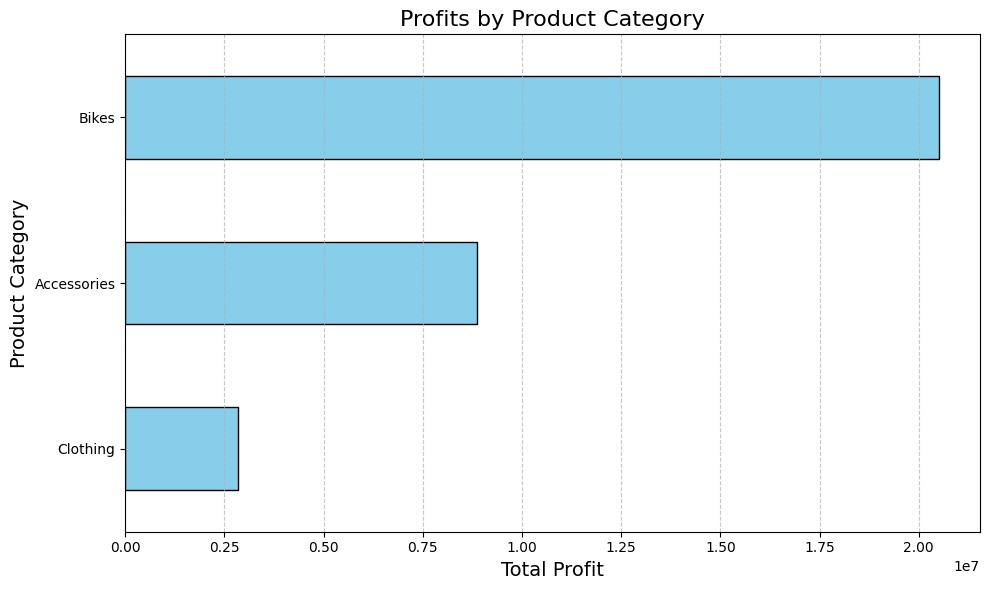

In [29]:
plt.figure(figsize=(10, 6))
category_profit.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

plt.title('Profits by Product Category', fontsize=16)
plt.xlabel('Total Profit', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
most_profitable = category_profit.idxmax()  
most_profitable_profit = category_profit.max() 
least_profitable = category_profit.idxmin()  
least_profitable_profit = category_profit.min() 
print(f"The most profitable product category is '{most_profitable}' with a total profit of {most_profitable_profit:.2f}.")
print(f"The least profitable product category is '{least_profitable}' with a total profit of {least_profitable_profit:.2f}.")

The most profitable product category is 'Bikes' with a total profit of 20519276.00.
The least profitable product category is 'Clothing' with a total profit of 2839447.00.


H. Line plot showing revenue and profit trends over each month 

In [31]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [2]:
start_month = int(input("Enter start month (1-12): "))
start_year = int(input("Enter start year (YYYY): "))
end_month = int(input("Enter end month (1-12): "))
end_year = int(input("Enter end year (YYYY): "))

In [6]:
start_date = pd.Timestamp(year=start_year, month=start_month, day=1)
end_date = pd.Timestamp(year=end_year, month=end_month, day=1)

In [9]:
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [10]:
filtered_df.set_index('Date', inplace=True)

In [12]:
monthly_data = filtered_df.resample('ME').agg({'Revenue': 'sum', 'Profit': 'sum'})

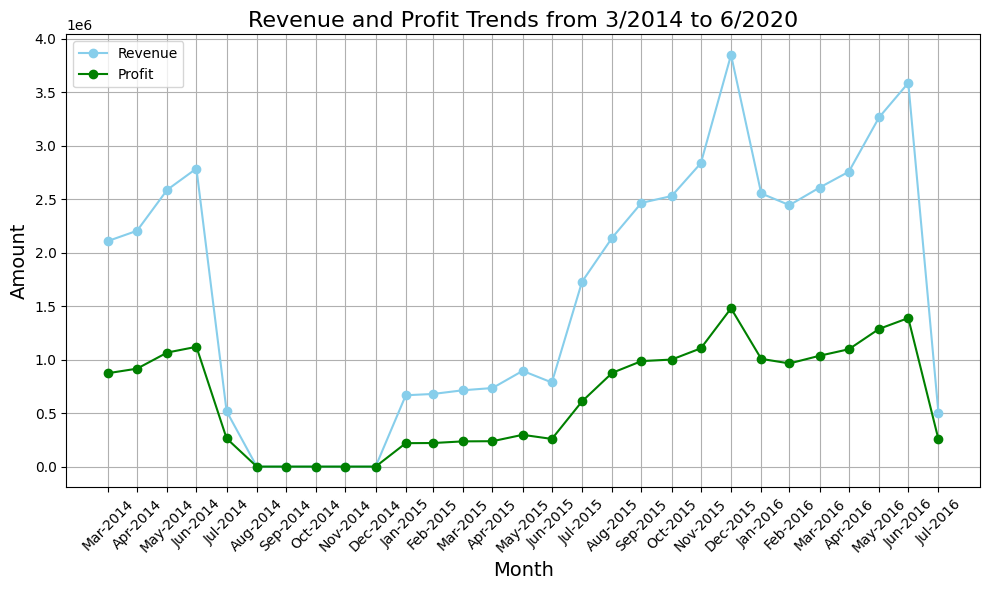

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Revenue'], label='Revenue', color='skyblue', marker='o')
plt.plot(monthly_data.index, monthly_data['Profit'], label='Profit', color='green', marker='o')
plt.title(f"Revenue and Profit Trends from {start_month}/{start_year} to {end_month}/{end_year}", fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(monthly_data.index, monthly_data.index.strftime('%b-%Y'), rotation=45)
plt.tight_layout()
plt.show()

I . Calculate the average profit margin per product. Plot using scatter plot